In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


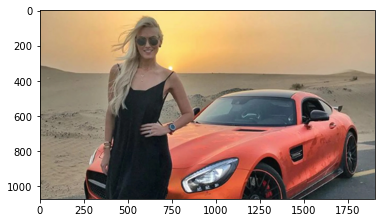

In [2]:
image = cv2.imread('./Images/SUPERCARBLONDIE_HP (1).jpg')
plt.imshow(image[:,:,::-1])

In [3]:
model = cv2.dnn.readNetFromDarknet('./yolov4.cfg' , './yolov4.weights')
model

< cv2.dnn.Net 00000239AFF35F10>

In [4]:
classes = []
k = open('./coco.names','r')
for i in k.readlines():
    classes.append(i.strip())
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320),True,crop = False)
blob

array([[[[0.5137255 , 0.5137255 , 0.5137255 , ..., 0.62352943,
          0.62352943, 0.62352943],
         [0.5137255 , 0.5137255 , 0.5137255 , ..., 0.62352943,
          0.62352943, 0.62352943],
         [0.50980395, 0.50980395, 0.5058824 , ..., 0.62352943,
          0.62352943, 0.62352943],
         ...,
         [0.47058827, 0.47450984, 0.48235297, ..., 0.40784317,
          0.40784317, 0.4156863 ],
         [0.45098042, 0.43529415, 0.48627454, ..., 0.41176474,
          0.41960788, 0.4156863 ],
         [0.41960788, 0.4156863 , 0.5254902 , ..., 0.4156863 ,
          0.41960788, 0.41960788]],

        [[0.6745098 , 0.6745098 , 0.6745098 , ..., 0.7058824 ,
          0.7058824 , 0.7058824 ],
         [0.6745098 , 0.6745098 , 0.6745098 , ..., 0.7058824 ,
          0.7058824 , 0.7058824 ],
         [0.67058825, 0.67058825, 0.6666667 , ..., 0.7058824 ,
          0.7058824 , 0.7058824 ],
         ...,
         [0.5411765 , 0.5372549 , 0.54509807, ..., 0.38431376,
          0.3921569 , 0.3

In [6]:
model.setInput(blob)

In [7]:
layers = model.getLayerNames()
layers

('conv_0',
 'bn_0',
 'mish_1',
 'conv_1',
 'bn_1',
 'mish_2',
 'conv_2',
 'bn_2',
 'mish_3',
 'identity_3',
 'conv_4',
 'bn_4',
 'mish_5',
 'conv_5',
 'bn_5',
 'mish_6',
 'conv_6',
 'bn_6',
 'mish_7',
 'shortcut_7',
 'conv_8',
 'bn_8',
 'mish_9',
 'concat_9',
 'conv_10',
 'bn_10',
 'mish_11',
 'conv_11',
 'bn_11',
 'mish_12',
 'conv_12',
 'bn_12',
 'mish_13',
 'identity_13',
 'conv_14',
 'bn_14',
 'mish_15',
 'conv_15',
 'bn_15',
 'mish_16',
 'conv_16',
 'bn_16',
 'mish_17',
 'shortcut_17',
 'conv_18',
 'bn_18',
 'mish_19',
 'conv_19',
 'bn_19',
 'mish_20',
 'shortcut_20',
 'conv_21',
 'bn_21',
 'mish_22',
 'concat_22',
 'conv_23',
 'bn_23',
 'mish_24',
 'conv_24',
 'bn_24',
 'mish_25',
 'conv_25',
 'bn_25',
 'mish_26',
 'identity_26',
 'conv_27',
 'bn_27',
 'mish_28',
 'conv_28',
 'bn_28',
 'mish_29',
 'conv_29',
 'bn_29',
 'mish_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'mish_32',
 'conv_32',
 'bn_32',
 'mish_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'mish_35',
 'conv_35',
 'bn_3

In [8]:
layers1 = model.getUnconnectedOutLayers()
layers1

array([327, 353, 379])

In [9]:
layer2 = model.getUnconnectedOutLayersNames()
layer2

('yolo_139', 'yolo_150', 'yolo_161')

In [10]:
output = [layers[i-1] for i in layers1]
output


['yolo_139', 'yolo_150', 'yolo_161']

In [11]:
out_layer_report = model.forward(output)

In [12]:
out_layer_report

(array([[0.01346247, 0.01037887, 0.02905763, ..., 0.        , 0.        ,
         0.        ],
        [0.01854688, 0.01932734, 0.03917002, ..., 0.        , 0.        ,
         0.        ],
        [0.02105876, 0.01817937, 0.05742968, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.98810816, 0.98840797, 0.02644616, ..., 0.        , 0.        ,
         0.        ],
        [0.981617  , 0.97912645, 0.03745648, ..., 0.        , 0.        ,
         0.        ],
        [0.97723246, 0.9809688 , 0.06679646, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.0390292 , 0.04256772, 0.11130811, ..., 0.        , 0.        ,
         0.        ],
        [0.04233471, 0.04289528, 0.13759312, ..., 0.        , 0.        ,
         0.        ],
        [0.03924582, 0.04140048, 0.15820262, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9581233 , 0.9565326 , 0.08674145, ..., 0.        , 0.        ,
         0.        

In [13]:
Threshold = 0.5
image_size = 320

def predictions(final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    
    for i in final_box.flatten():
        if classes_names[ids[i]] == 'person' or classes_names[ids[i]] == 'car':
            x , y , w , h = cordinates[i]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            font = cv2.FONT_HERSHEY_PLAIN
            cnf = str(round(confidence_score[i] , 2))
            text = str(classes[ids[i]])+'--'+cnf
            
            cv2.rectangle(image , (x,y) , (x+w,y+h) , (255,0,0),2)
            cv2.putText(image,text , (x ,y) , font,3,(0,0,255),2)
        else:
            pass


def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


image = cv2.imread('./Images/SUPERCARBLONDIE_HP (1).jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_width , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./yolov4.cfg','./yolov4.weights')
classes_names = []
k = open('./coco.names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)

                
        
    
final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
predictions(final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
    

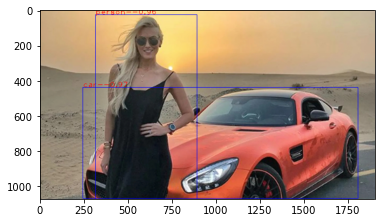

In [14]:
plt.imshow(image[:,:,::-1])

## OBJECT DETECTION FOR VIDEOS

In [15]:
Threshold = 0.5
image_size = 320

total_persons_detected = []
total_cars_detected = []


def predictions(frame , final_box , cordinates , confidence_score , ids ,width_ratio,height_ratio):
    c = []
    k = []
    count1 = 0
    count2 = 0
    if len(final_box) > 0:
        for i in final_box.flatten():
            if classes_names[ids[i]] == 'car':
                count1+=1
                k.append(count1)
                
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf+'%'
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (0,255,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
            if classes_names[ids[i]] == 'person':
                count2+=1
                c.append(count2)
                x , y , w , h = cordinates[i]
                x = int(x * width_ratio)
                y = int(y * height_ratio)
                w = int(w * width_ratio)
                h = int(h * height_ratio)
                font = cv2.FONT_HERSHEY_COMPLEX_SMALL
                cnf = str(round(confidence_score[i] , 2))
                text = str(classes_names[ids[i]])+'-'+cnf
                cv2.rectangle(frame , (x,y) , (x+w,y+h) , (255,0,0),2,cv2.LINE_AA)
                cv2.putText(frame,text , (x ,y-2) , font,1,(255,255,255),1,cv2.LINE_AA)
        if len(k) > 0:
            text1 = 'Total cars : {}'.format(k[-1])
            cv2.putText(frame , text1 , (10,25) , font,1,(255,255,0),1,cv2.LINE_4) 
        else:
            k.append(0)
            text1 = 'Total cars : {}'.format(k[-1])
            cv2.putText(frame , text1 , (10,25) , font,1,(255,255,0),1,cv2.LINE_4) 
        
        if len(c) > 0:
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        else:
            c.append(0)
            text1 = 'Total Persons : {}'.format(c[-1])
            cv2.putText(frame , text1 , (200,25) , font,1,(0,0,255),1,cv2.LINE_4) 
        

        print('cars = ',len(k))
        print('persons = ',len(c))

def bounding_box(detections):
    confidence_score = []
    ids = []
    cordinates = []
    
    
    for i in detections:
        for j in i:
            probs_values = j[5:]
            class_ = np.argmax(probs_values)
            confidence_ = probs_values[class_]
            
            if confidence_ > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)
                cordinates.append([x,y,w,h])
                ids.append(class_)
                confidence_score.append(confidence_)
    final_box = cv2.dnn.NMSBoxes(cordinates , confidence_score , Threshold , .6)
    return final_box , cordinates , confidence_score , ids


cap = cv2.VideoCapture('./yolo_test.mp4')

#image = cv2.imread('./testing images/test_2.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()

while(cap.isOpened()):
    res , frame = cap.read()
    if res == True:
        original_width , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./yolov4.cfg','./yolov4.weights')
        classes_names = []
        k = open('./coco.names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
            #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
            #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
            #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
            #print(outputs)
        output_data = Neural_Network.forward(outputs)
        final_box , cordinates , confidence_score , ids = bounding_box(output_data)   
        predictions(frame , final_box , cordinates , confidence_score , ids ,original_width / 320,original_height / 320 )    
        cv2.imshow('frame' , frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

cars =  1
persons =  6
cars =  1
persons =  7
cars =  1
persons =  7
cars =  1
persons =  7
cars =  1
persons =  7
cars =  1
persons =  6
cars =  1
persons =  6
cars =  1
persons =  6
cars =  1
persons =  7
cars =  1
persons =  7
cars =  1
persons =  7
cars =  1
persons =  7


In [16]:
## Information after NMS

In [17]:
final_box

array([35, 22, 16, 30, 12, 18, 19,  6, 24])

In [18]:
cordinates

[[5, 63, 18, 86],
 [5, 63, 20, 86],
 [8, 63, 18, 87],
 [242, 81, 10, 51],
 [241, 81, 11, 51],
 [242, 82, 11, 50],
 [243, 82, 11, 51],
 [37, 71, 18, 87],
 [37, 72, 19, 85],
 [39, 70, 19, 89],
 [39, 70, 20, 88],
 [273, 96, 11, 40],
 [273, 96, 11, 39],
 [273, 96, 11, 39],
 [204, 205, 22, 93],
 [203, 205, 23, 93],
 [6, 59, 17, 93],
 [8, 55, 17, 99],
 [38, 70, 17, 87],
 [51, 73, 16, 87],
 [70, 43, 33, 161],
 [69, 43, 34, 161],
 [70, 43, 33, 161],
 [290, -3, 30, 279],
 [290, -7, 29, 286],
 [290, 2, 29, 291],
 [155, 45, 67, 259],
 [156, 43, 65, 279],
 [157, 48, 70, 271],
 [155, 54, 66, 277],
 [204, 198, 22, 99],
 [204, 197, 22, 101],
 [204, 194, 23, 104],
 [68, 48, 37, 153],
 [155, 49, 67, 273],
 [155, 49, 67, 274],
 [157, 53, 71, 267],
 [156, 52, 71, 269],
 [155, 60, 67, 265],
 [155, 58, 67, 269]]

In [19]:
confidence_score

[0.79484683,
 0.6414662,
 0.6708888,
 0.5570599,
 0.61537737,
 0.6512967,
 0.7206511,
 0.677718,
 0.66595656,
 0.6506757,
 0.545654,
 0.7583787,
 0.7794455,
 0.7317523,
 0.5403279,
 0.5189051,
 0.8718429,
 0.8653561,
 0.77671754,
 0.74834424,
 0.9788906,
 0.9752413,
 0.979877,
 0.62274104,
 0.6454402,
 0.52920866,
 0.7479001,
 0.99663234,
 0.6755929,
 0.847866,
 0.804478,
 0.75131917,
 0.6191065,
 0.8671594,
 0.997792,
 0.9979548,
 0.9179462,
 0.923533,
 0.81630635,
 0.8135935]

In [20]:
ids

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 26,
 26,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 0,
 0,
 0,
 0,
 26,
 26,
 26,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Saving each frame

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.3
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    if len(prediction_box) > 0:
        for k in prediction_box.flatten():
            x , y , w , h = bounding_box[k]
            x = int(x * width_ratio)
            y = int(y * height_ratio)
            w = int(w * width_ratio)
            h = int(h * height_ratio)
            conf_level = str(round(confidence[k] , 2))
            label = str(classes_names[class_labels[k]])
            cv2.rectangle(frame , (x,y),(x+w , y+h),(255,0,0),1)
            cv2.putText(frame ,label+' '+conf_level,(x,y-2),font,0.5,(0,0,255),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .3)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels




count = 0
image = cv2.VideoCapture('./yolo_test.mp4')
while image.read():
    res , frame = image.read()
    if res == True:
        original_with , original_height = frame.shape[1] , frame.shape[0]

        Neural_Network = cv2.dnn.readNetFromDarknet('./yolov4.cfg','./yolov4.weights')
        classes_names = []
        k = open('./coco.names','r')
        for i in k.readlines():
            classes_names.append(i.strip())
        #print(classes_names)
        blob = cv2.dnn.blobFromImage(frame , 1/255 , (320,320) , True , crop = False)
        #print(blob.shape)
        Neural_Network.setInput(blob)
        cfg_data = Neural_Network.getLayerNames()
        #print(cfg_data)
        layer_names = Neural_Network.getUnconnectedOutLayers()
        outputs = [cfg_data[i-1] for i in layer_names]
        #print(outputs)
        output_data = Neural_Network.forward(outputs)
        prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)

        final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )
        cv2.imwrite('./frames/%d.jpg'%count,frame)
        cv2.imshow('YOLO Algorithm', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        count+=1
    else:
        break 

image.release()
cv2.destroyAllWindows()


In [ ]:
import os
c = []
for i in os.listdir('./frames/'):
    c.append(i)

In [ ]:
c

In [ ]:
# sorting all frames 
import re
c.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [ ]:
img_array = []
for frame in c:
    img = cv2.imread('./frames/'+str(frame))
    height , width , layers = img.shape
    size = (width , height)
    img_array.append(img)
out = cv2.VideoWriter('./results/output4.mp4',cv2.VideoWriter_fourcc(*'XVID'),5,size)
for l in range(len(img_array)):
    out.write(img_array[l])
out.release()